# DBSCAN v2

In [15]:
import sys
sys.path.append("..")

import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

from src.cluster import calculate_k_distances, dbscan_kdist_analysis, \
    assign_dbscan_multidensity, dbscan_kdist_analysis_zoom

## Read in scaled features

In [16]:
df = pd.read_csv("../data/cohort_features_scaled_v2.csv", index_col="ID")
df.head(5)

,n_stays,anchor_age,suspected_infection,weight,height_chart,heart_rate_min,heart_rate_max,temperature_min,temperature_max,nbpm_min,...,dopamine,epinephrine,norepinephrine,phenylephrine,vasopressin,dobutamine,milrinone,albumin,bilirubin,abps
ID,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.909091,1,-1.329023,-1.333333,1.045455,0.571429,0.888889,1.000000,-1.733333,...,0,0,1,1,0,0,0,0,1,1
1,0.0,0.818182,1,-0.521152,0.333333,-0.500000,1.321429,-0.111111,-0.333333,-0.333333,...,0,0,0,1,0,0,0,0,0,1
2,0.0,0.181818,0,-0.922558,-0.466667,0.409091,0.428571,2.111111,0.500000,0.933333,...,0,0,0,0,0,0,0,0,1,1
3,0.0,-0.409091,1,0.986648,0.666667,0.545455,0.107143,0.888889,1.111111,0.333333,...,0,0,0,0,0,0,0,0,0,0
4,0.0,-1.000000,1,0.057344,0.533333,0.590909,0.535714,0.444444,0.111111,1.533333,...,0,0,0,0,0,0,0,1,1,1


## Parameter exploration

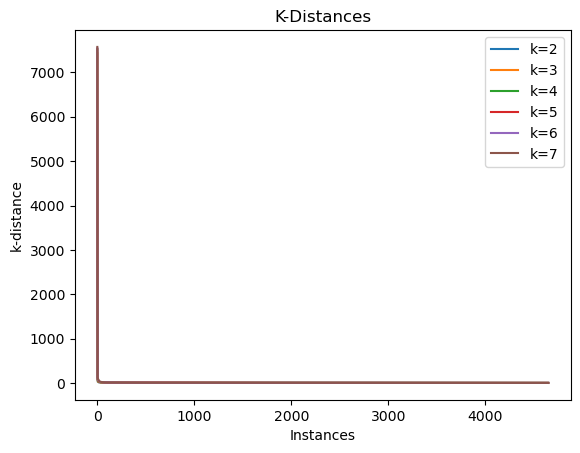

In [17]:
"""
Use k-distances to determine min_pts and eps
k = min_pts - 1
"""
k_list = [2, 3, 4, 5, 6, 7]
dbscan_kdist_analysis(args=(k_list, df))

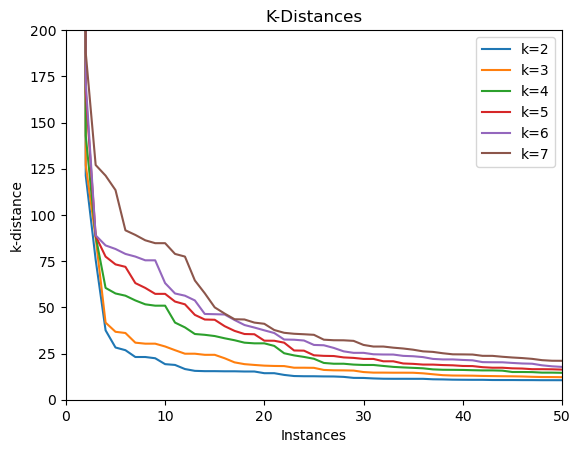

In [18]:
"""
Use k-distances to determine min_pts and eps
k = min_pts - 1
"""
k_list = [2, 3, 4, 5, 6, 7]
dbscan_kdist_analysis_zoom(args=(k_list, df, 50, 200))

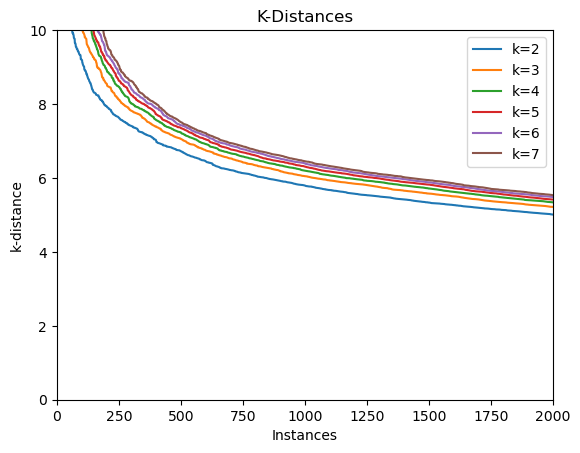

In [22]:
"""
Use k-distances to determine min_pts and eps
k = min_pts - 1
"""
k_list = [2, 3, 4, 5, 6, 7]
dbscan_kdist_analysis_zoom(args=(k_list, df, 2000, 10))

## Assign the clusters

In [31]:
eps_list = [6.3]
k = 4
min_pts = k + 1

assigned_clusters = assign_dbscan_multidensity(args=(eps_list, min_pts, df.copy()))
assigned_clusters.to_csv(f"../data/cohort_clusters_dbscan_v2.csv")
assigned_clusters

DBSCAN run:0 eps:6.3 n:4648


ID
0       1000
1       1000
2       1000
3       1000
4       1000
        ... 
4643      -1
4644    1000
4645    1000
4646    1000
4647    1000
Name: cluster, Length: 4648, dtype: int64

In [32]:
assigned_clusters.value_counts()

 1000    3924
-1        709
 1001      15
Name: cluster, dtype: int64

## Generate the COS

In [33]:
# Get the cluster label for COS
cos_label = assigned_clusters.value_counts().index[0]
cos_label

1000

In [34]:
# Load the original dataset with the unscaled features
df_original = pd.read_csv("../data/cohort_processed_v2.csv", index_col="ID")
len(df_original)

4648

In [35]:
df_cluster = pd.merge(left=df_original, right=assigned_clusters, on="ID")
cos = df_cluster[df_cluster["cluster"] == cos_label].drop(columns=["cluster"])
cos.to_csv("../data/cos_features_dbscan_v2.csv")
cos

,subject_id,hadm_id,stay_id,n_stays,sum_los,anchor_age,suspected_infection,weight,height_chart,heart_rate_min,...,dopamine,epinephrine,norepinephrine,phenylephrine,vasopressin,dobutamine,milrinone,albumin,bilirubin,abps
ID,,,,,,,,,,,,,,,,,,,,,
0,10002428,28662225,33987268,2,12.014028,80,1,43.00,150.0,93.0,...,0,0,1,1,0,0,0,0,1,1
1,10004422,21255400,32155744,1,6.356898,78,1,66.95,175.0,59.0,...,0,0,0,1,0,0,0,0,0,1
2,10004606,29242151,30213599,1,5.166100,64,0,55.05,163.0,79.0,...,0,0,0,0,0,0,0,0,1,1
3,10004733,27411876,39635619,1,8.357373,51,1,111.65,180.0,82.0,...,0,0,0,0,0,0,0,0,0,0
4,10005606,29646384,38740124,1,6.595347,38,1,84.10,178.0,83.0,...,0,0,0,0,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4642,19991538,26694123,39801924,1,25.354178,36,1,92.00,173.0,84.0,...,0,0,0,0,0,0,0,0,0,0
4644,19995780,21942461,36805359,1,3.383530,84,0,87.40,168.0,62.0,...,0,0,0,1,0,0,0,0,0,1
4645,19997448,23560173,33380030,2,3.656262,52,0,86.30,160.0,73.0,...,0,0,0,1,0,0,0,0,0,1
